# Imports


In [49]:
%load_ext autoreload
%autoreload 2
import os

while not os.getcwd().endswith("dynamic-clustering"):
    os.chdir("..")
    print(os.getcwd())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
import numpy as np
from scripts.clusterer import CluStream
from scripts.dynamic_clusterer_multi_dimension import DynamicClusterer
from scripts.utils import get_colors, clean_directory

from river import drift

In [51]:
colors = get_colors()


def import_and_shuffle_csv(file_path):
    final_2d_data = np.loadtxt(file_path, delimiter=",")

    reference_data = final_2d_data[:1000]
    np.random.shuffle(reference_data)

    batch1 = final_2d_data[1000:1200]
    np.random.shuffle(batch1)

    batch2 = final_2d_data[1200:1400]
    np.random.shuffle(batch2)

    batch3 = final_2d_data[1400:1600]
    np.random.shuffle(batch3)

    batch4 = final_2d_data[1600:1800]
    np.random.shuffle(batch4)

    batch5 = final_2d_data[1800:2000]
    np.random.shuffle(batch5)

    return reference_data, [batch1, batch2, batch3, batch4, batch5]

number of colors defined: 20


In [52]:
# file_path, drift_type = "./data/final_3d_brightness.csv", "BRIGHTNESS-3D"
# file_path, drift_type = "./data/final_4d_brightness.csv", "BRIGHTNESS-4D"
# file_path, drift_type = "./data/final_8d_brightness.csv", "BRIGHTNESS-8D"
# file_path, drift_type = "./data/final_16d_brightness.csv", "BRIGHTNESS-16D"
# file_path, drift_type = "./data/final_32d_brightness.csv", "BRIGHTNESS-32D"
# file_path, drift_type = "./data/final_64d_brightness.csv", "BRIGHTNESS-64D"
# file_path, drift_type = "./data/final_128d_brightness.csv", "BRIGHTNESS-128D"
# file_path, drift_type = "./data/final_256d_brightness.csv", "BRIGHTNESS-256D"
# file_path, drift_type = "./data/final_512d_brightness.csv", "BRIGHTNESS-512D"
file_path, drift_type = "./data/full_brightness_embeddings.csv", "BRIGHTNESS-FULL-EMBEDDINGS"
reference_data, batches = import_and_shuffle_csv(file_path)

full_prod_data = np.concatenate(batches, axis=0)

ids = []

In [53]:
def init_dynamic_clusterer(data=reference_data, threshold=5):
    clustream_model = CluStream(
        max_micro_clusters=200,
        time_window=100,
        seed=0,
    )
    drift_detector = drift.PageHinkley(delta=0.0005, threshold=threshold)

    dynamic_clusterer = DynamicClusterer(
        data,
        clustream_model,
        drift_detector,
        colors,
        ax_limit=10
    )

    return dynamic_clusterer

New model created - id: 23664
(id: 0)
(id: 1)
<!> Change detected! Possible input drift at timestamp 8 ----> Apply macroclustering <!>



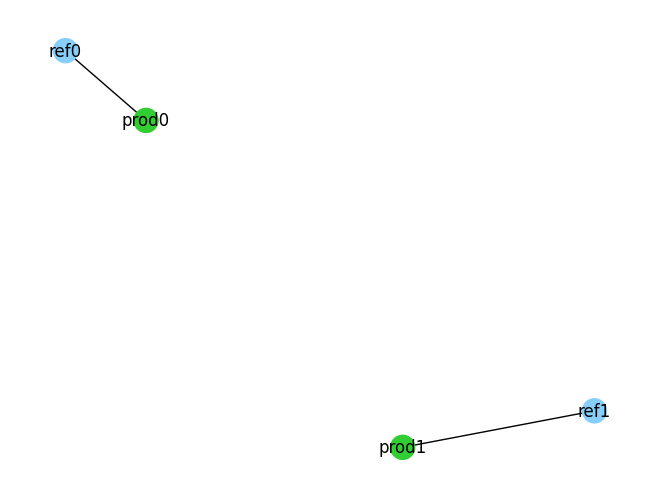

(id: 0) SURVIVED as (id: 0) (score: 0.9812132027278316)
(id: 1) SURVIVED as (id: 1) (score: 0.987006554991507)
Final macroclusters:
(id: 0)
(id: 1)

-----------------------------------------------------------------------------------

<!> Change detected! Possible input drift at timestamp 175 ----> Apply macroclustering <!>



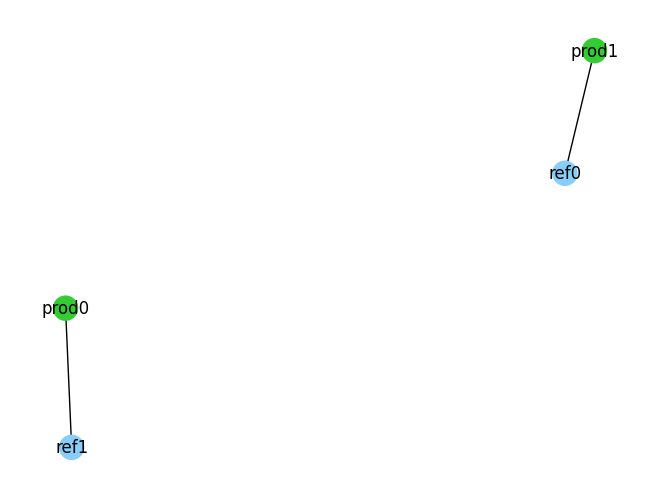

(id: 1) SURVIVED as (id: 1) (score: 0.8708926198086068)
(id: 0) SURVIVED as (id: 0) (score: 0.8636030129683097)
Final macroclusters:
(id: 0)
(id: 1)

-----------------------------------------------------------------------------------

<!> Change detected! Possible input drift at timestamp 228 ----> Apply macroclustering <!>



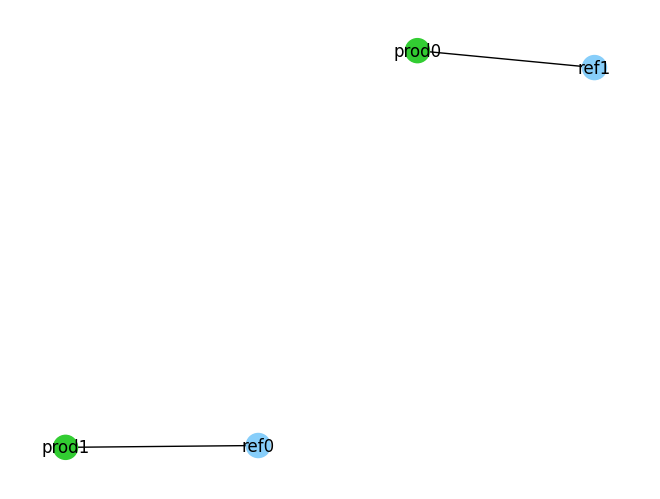

(id: 1) SURVIVED as (id: 1) (score: 0.9100006493719629)
(id: 0) SURVIVED as (id: 0) (score: 0.8889262741084303)
Final macroclusters:
(id: 0)
(id: 1)

-----------------------------------------------------------------------------------

<!> Change detected! Possible input drift at timestamp 436 ----> Apply macroclustering <!>



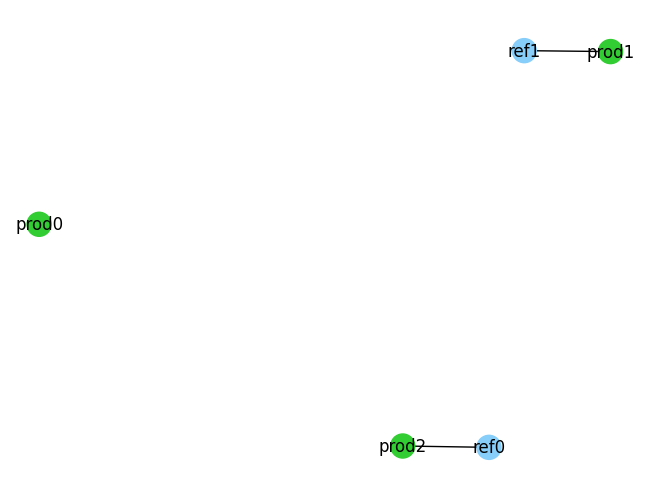

(!) (id: 2) APPEARED --- (score: 0.5610182143392518)
(id: 1) SURVIVED as (id: 1) (score: 0.8232526137659618)
(id: 0) SURVIVED as (id: 0) (score: 0.8661271177045264)
Final macroclusters:
(id: 0)
(id: 1)
(id: 2)

-----------------------------------------------------------------------------------

<!> Change detected! Possible input drift at timestamp 657 ----> Apply macroclustering <!>



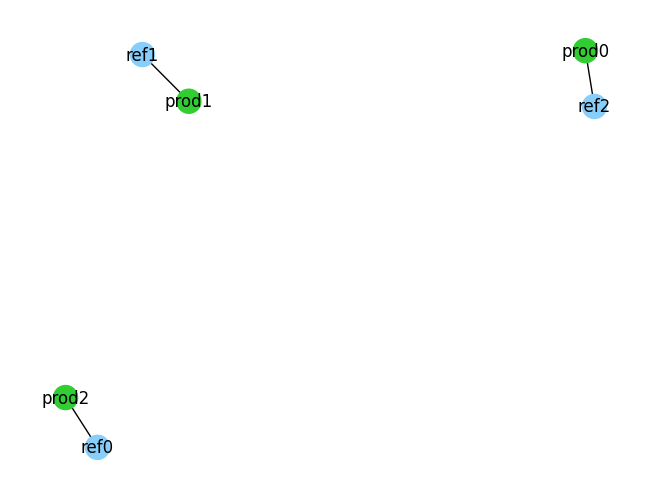

(id: 2) SURVIVED as (id: 2) (score: 0.7899990656352839)
(id: 1) SURVIVED as (id: 1) (score: 0.9818412892016399)
(id: 0) SURVIVED as (id: 0) (score: 0.9168776454296166)
Final macroclusters:
(id: 0)
(id: 1)
(id: 2)

-----------------------------------------------------------------------------------

<!> Change detected! Possible input drift at timestamp 896 ----> Apply macroclustering <!>



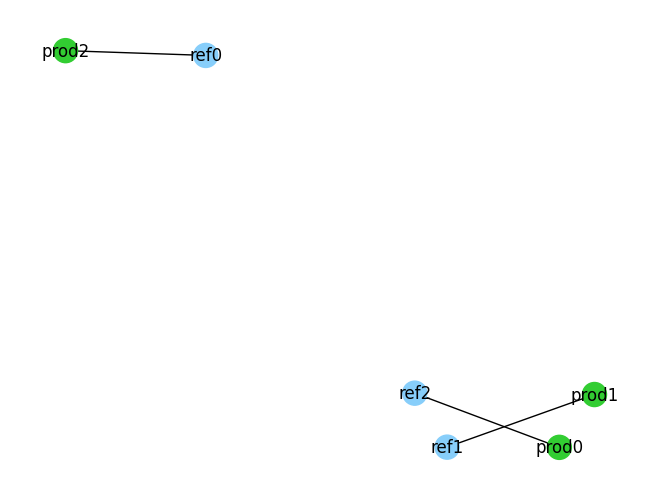

(id: 2) SURVIVED as (id: 2) (score: 0.8663399525630068)
(id: 1) SURVIVED as (id: 1) (score: 0.9632025203922301)
(id: 0) SURVIVED as (id: 0) (score: 0.9669092691108178)
Final macroclusters:
(id: 0)
(id: 1)
(id: 2)

-----------------------------------------------------------------------------------

Batch Finished ----> Apply macroclustering



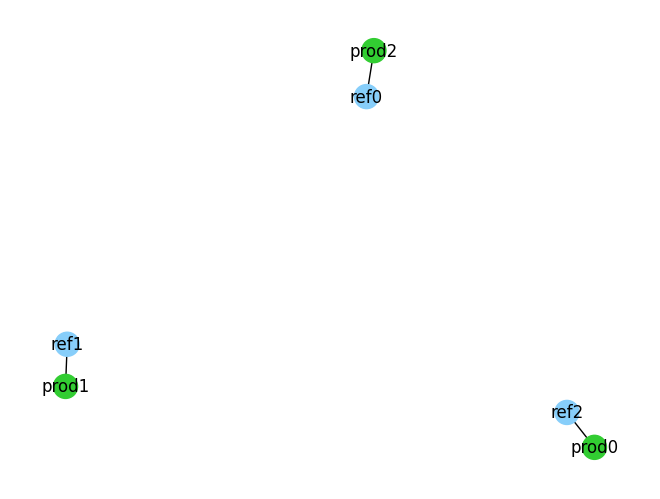

(id: 2) SURVIVED as (id: 2) (score: 0.9758644142028152)
(id: 1) SURVIVED as (id: 1) (score: 0.9999999999999987)
(id: 0) SURVIVED as (id: 0) (score: 0.9775707732049729)
Final macroclusters:
(id: 0)
(id: 1)
(id: 2)

-----------------------------------------------------------------------------------



In [54]:
clustream = init_dynamic_clusterer()

id = clustream.get_id()
ids.append(id)

clustream.receive_prod(full_prod_data)
clustream.fit_prod_data(plot_img=False, print_graph=True, macroclustering_at_end=True)

Drawing ...


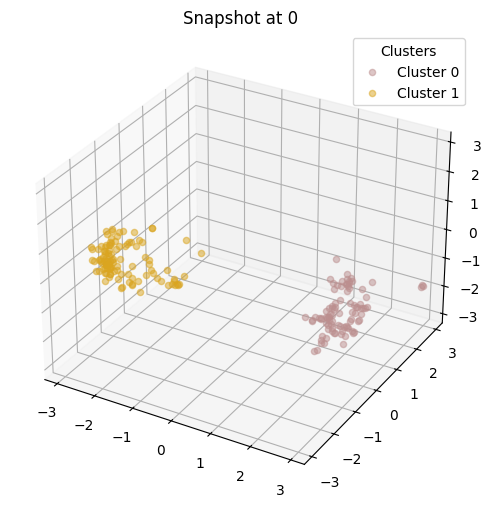

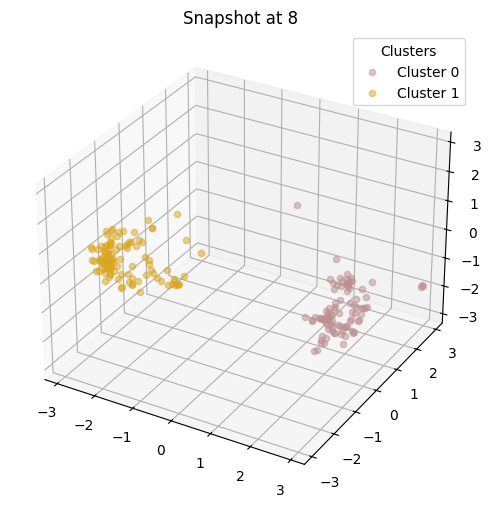

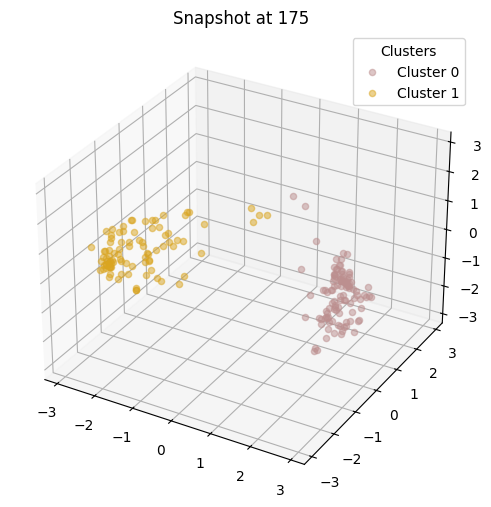

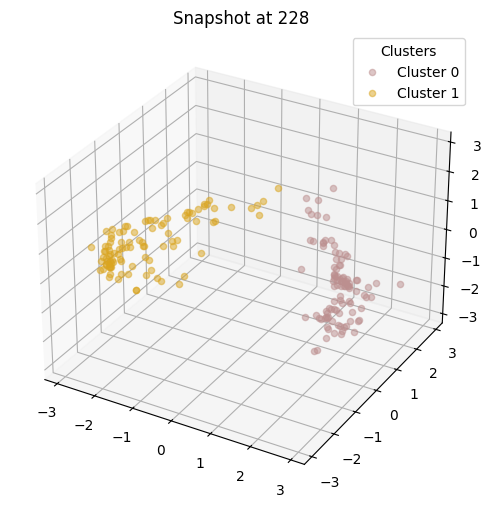

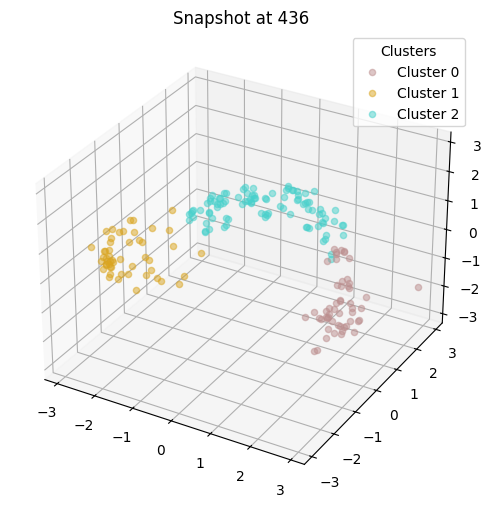

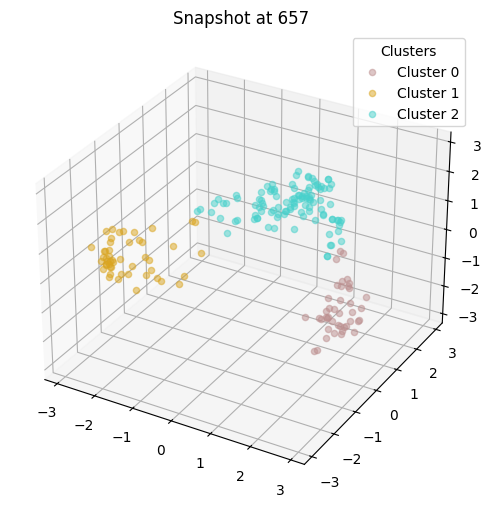

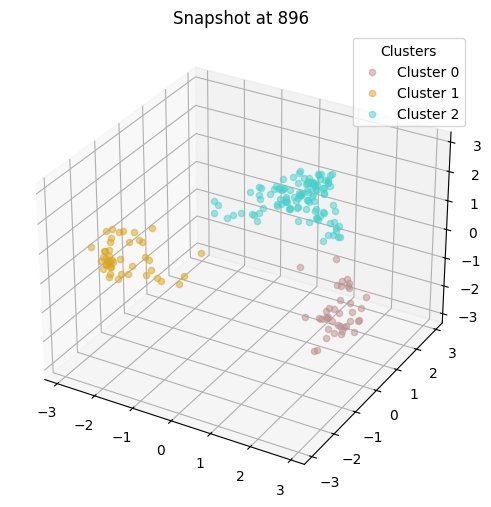

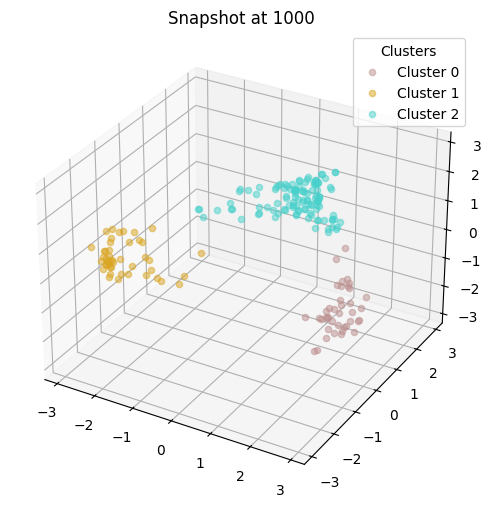

In [55]:
clustream.visualization(dimensions=3, show_image=True, save_gif=True)

In [56]:
# Clean directory

# for id in ids:
#     ids.remove(id)
#     clean_directory(f"./plots/{id}")
#     print(f"Deleted {id}")
